In [18]:
from typing import Dict

import matplotlib.pyplot as plt
import numpy as np
import sys
import warnings
from copy import deepcopy
from pathlib import Path

sys.path.append("../../")

from blackthorn import Gen, RhNeutrinoMeV, RhNeutrinoGeV
from blackthorn.fields import Muon, ChargedPion, ChargedKaon, NeutralPion
from blackthorn.utils import state_to_latex

In [21]:
def state_to_catagory(state: str):
    states = state.split(" ")
    cat = []

    for s in states:
        if s in ["ve", "vmu", "vtau"]:
            cat.append("nu")
        elif s in ["u", "c", "t"]:
            cat.append("ui")
        elif s in ["ubar", "cbar", "tbar"]:
            cat.append("uibar")
        elif s in ["d", "s", "b"]:
            cat.append("di")
        elif s in ["dbar", "sbar", "bbar"]:
            cat.append("dibar")
        elif s in ["e", "mu", "tau"]:
            cat.append("li")
        elif s in ["ebar", "mubar", "taubar"]:
            cat.append("libar")
        else:
            cat.append(s)
    return " ".join(cat)

def state_to_latex(state: str):

    if state == "ve h":
        return r"$\nu_{e} + h$"
    if state == "vmu h":
        return r"$\nu_{\mu} + h$"
    if state == "vtau h":
        return r"$\nu_{\tau} + h$"

    if state == "ve z":
        return r"$\nu_{e} + Z$"
    if state == "vmu z":
        return r"$\nu_{\mu} + Z$"
    if state == "vtau z":
        return r"$\nu_{\tau} + Z$"

    if state == "e w":
        return r"$e^{\mp} + W^{\pm}$"
    if state == "mu w":
        return r"$\mu^{\mp} + W^{\pm}$"
    if state == "tau w":
        return r"$\tau^{\mp} + W^{\pm}$"

    if state == "ve ui uibar":
        return r"$\nu_{e} + u_{i} + \bar{u}_{i}$"
    if state == "vmu ui uibar":
        return r"$\nu_{\mu} + u_{i} + \bar{u}_{i}$"
    if state == "vtau ui uibar":
        return r"$\nu_{\tau} + u_{i} + \bar{u}_{i}$"

    if state == "ve t tbar":
        return r"$\nu_{e} + t + \bar{t}$"
    if state == "vmu t tbar":
        return r"$\nu_{\mu} + t + \bar{t}$"
    if state == "vtau t tbar":
        return r"$\nu_{\tau} + t + \bar{t}$"

    if state == "ve di dibar":
        return r"$\nu_{e} + d_{i} + \bar{d}_{i}$"
    if state == "vmu di dibar":
        return r"$\nu_{\mu} + d_{i} + \bar{d}_{i}$"
    if state == "vtau di dibar":
        return r"$\nu_{\tau} + d_{i} + \bar{d}_{i}$"

    if state == "e ui djbar":
        return r"$e^{\mp} + u_{i} + \bar{d}_{j}$"
    if state == "mu ui djbar":
        return r"$\mu^{\mp} + u_{i} + \bar{d}_{j}$"
    if state == "tau ui djbar":
        return r"$\tau^{\mp} + u_{i} + \bar{d}_{j}$"

    if state == "nu li libar":
        return r"$\nu + \ell^{\pm}_{i} + \ell^{\mp}$"

    if state == "nu nu nu":
        return r"$\nu + \nu + \nu$"

    if state == "e pi":
        return r"$e^{\mp} + \pi^{\pm}$"
    if state == "mu pi":
        return r"$\mu^{\mp} + \pi^{\pm}$"
    if state == "tau pi":
        return r"$\tau^{\mp} + \pi^{\pm}$"

    if state == "ve pi0":
        return r"$\nu_{e} + \pi^{0}$"
    if state == "vmu pi0":
        return r"$\nu_{\mu} + \pi^{0}$"
    if state == "vtau pi0":
        return r"$\nu_{\tau} + \pi^{0}$"

    if state == "ve eta":
        return r"$\nu_{e} + \eta$"
    if state == "vmu eta":
        return r"$\nu_{\mu} + \eta$"
    if state == "vtau eta":
        return r"$\nu_{\tau} + \eta$"

    if state == "ve a":
        return r"$\nu_{e} + \gamma$"
    if state == "vmu a":
        return r"$\nu_{\mu} + \gamma$"
    if state == "vtau a":
        return r"$\nu_{\tau} + \gamma$"

    if state == "ve pi pibar":
        return r"$\nu_{e} + \pi^{\pm}+ \pi^{\mp}$"
    if state == "vmu pi pibar":
        return r"$\nu_{\mu} + \pi^{\pm}+ \pi^{\mp}$"
    if state == "vtau pi pibar":
        return r"$\nu_{\tau} + \pi^{\pm}+ \pi^{\mp}$"

    if state == "e pi pi0":
        return r"$e^{\mp} + \pi^{\pm} + \pi^{0}$"
    if state == "mu pi pi0":
        return r"$\mu^{\mp} + \pi^{\pm} + \pi^{0}$"
    if state == "tau pi pi0":
        return r"$\tau^{\mp} + \pi^{\pm} + \pi^{0}$"

    if state == "e k":
        return r"$e^{\mp} + K^{\pm}$"
    if state == "mu k":
        return r"$\mu^{\mp} + K^{\pm}$"
    if state == "tau k":
        return r"$\tau^{\mp} + K^{\pm}$"

    raise ValueError(f"Unknown state {state}")


def branching_fraction_catagorized_gev(data: Dict, gen):
    if gen == Gen.Fst:
        l0 = "e"
        l1 = "mu"
        l2 = "tau"
    elif gen == Gen.Snd:
        l0 = "mu"
        l1 = "e"
        l2 = "tau"
    else:
        l0 = "tau"
        l1 = "e"
        l2 = "mu"
    catagorized = {}

    catagorized[f"v{l0} h"] = data[f"v{l0} h"][:]
    catagorized[f"v{l0} z"] = data[f"v{l0} z"][:]
    catagorized[f"{l0} w"] = data[f"{l0} w"][:]

    # N -> v + u + u
    catagorized[f"v{l0} ui uibar"] = data[f"v{l0} u ubar"][:] + data[f"v{l0} c cbar"][:]
    catagorized[f"v{l0} t tbar"] = data[f"v{l0} t tbar"][:]
    # N -> v + d + d
    catagorized[f"v{l0} di dibar"] = (
        data[f"v{l0} d dbar"][:] + data[f"v{l0} s sbar"][:] + data[f"v{l0} b bbar"][:]
    )

    # N -> l + u + d
    catagorized[f"{l0} ui djbar"] = (
        data[f"{l0} u dbar"][:]
        + data[f"{l0} u sbar"][:]
        + data[f"{l0} u bbar"][:]
        + data[f"{l0} c dbar"][:]
        + data[f"{l0} c sbar"][:]
        + data[f"{l0} c bbar"][:]
        + data[f"{l0} t dbar"][:]
        + data[f"{l0} t sbar"][:]
        + data[f"{l0} t bbar"][:]
    )

    catagorized["nu li libar"] = (
        data[f"v{l0} {l0} {l0}bar"][:]
        + data[f"v{l0} {l1} {l1}bar"][:]
        + data[f"v{l0} {l2} {l2}bar"][:]
        + data[f"v{l1} {l0} {l1}bar"][:]
        + data[f"v{l2} {l0} {l2}bar"][:]
    )

    catagorized["nu nu nu"] = (
        data[f"v{l0} v{l0} v{l0}"][:]
        + data[f"v{l0} v{l1} v{l1}"][:]
        + data[f"v{l0} v{l2} v{l2}"][:]
    )

    return catagorized


def branching_fraction_catagorized_mev(data: Dict, gen):
    if gen == Gen.Fst:
        l0 = "e"
        l1 = "mu"
    elif gen == Gen.Snd:
        l0 = "mu"
        l1 = "e"
    else:
        raise ValueError("Invalid gen")

    catagorized = {}

    catagorized[f"{l0} k"] = data[f"{l0} k"][:]
    catagorized[f"{l0} pi"] = data[f"{l0} pi"][:]
    catagorized[f"{l0} pi pi0"] = data[f"{l0} pi pi0"][:]
    catagorized[f"v{l0} pi0"] = data[f"v{l0} pi0"][:]
    catagorized[f"v{l0} eta"] = data[f"v{l0} eta"][:]
    catagorized[f"v{l0} a"] = data[f"v{l0} a"][:]
    catagorized[f"v{l0} pi pibar"] = data[f"v{l0} pi pibar"][:]

    catagorized["nu li libar"] = (
        data[f"v{l0} {l0} {l0}bar"][:]
        + data[f"v{l0} {l1} {l1}bar"][:]
        # + data[f"v{l0} {l2} {l2}bar"][:]
        + data[f"v{l1} {l0} {l1}bar"][:]
        # + data[f"v{l2} {l0} {l2}bar"][:]
    )

    catagorized["nu nu nu"] = (
        data[f"v{l0} v{l0} v{l0}"][:]
        + data[f"v{l0} v{l1} v{l1}"][:]
        # + data[f"v{l0} v{l2} v{l2}"][:]
    )

    return catagorized

## Electron-Neutrino

In [12]:
generation = Gen.Fst

mns_mev_e = np.geomspace(1e-4, 0.5, 250)
model = RhNeutrinoMeV(mns_mev_e[-1], 1e-3, generation)

mns_mev_e_inner = np.geomspace(0.5, 1.0, 250)
model = RhNeutrinoMeV(mns_mev_e[-1], 1e-3, generation)

keys = model.branching_fractions().keys()
ws_mev_e = {key: np.zeros_like(mns_mev_e) for key in keys}
ws_mev_e_inner = {key: np.zeros_like(mns_mev_e_inner) for key in keys}


for i, mn in enumerate(mns_mev_e):
    model = RhNeutrinoMeV(mn, 1e-3, generation)
    for key, val in model.branching_fractions().items():
        ws_mev_e[key][i] = val

for i, mn in enumerate(mns_mev_e_inner):
    model = RhNeutrinoMeV(mn, 1e-3, generation)
    for key, val in model.branching_fractions().items():
        ws_mev_e_inner[key][i] = val

mns_gev_e = np.geomspace(5.0, 1e3, 250)
model = RhNeutrinoGeV(mns_gev_e[-1], 1e-3, generation)

keys = model.branching_fractions().keys()
ws_gev_e = {key: np.zeros_like(mns_gev_e) for key in keys}


for i, mn in enumerate(mns_gev_e):
    model = RhNeutrinoGeV(mn, 1e-3, generation)
    for key, val in model.branching_fractions().items():
        ws_gev_e[key][i] = val

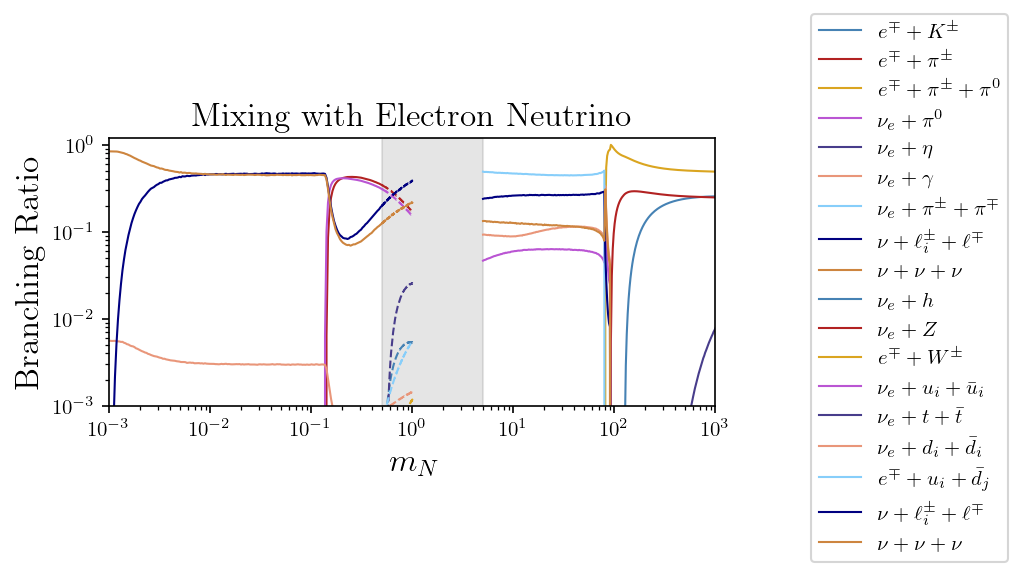

In [25]:

plt.figure(dpi=150, figsize=(8,4))

ymin, ymax = 1e-3, 1.2e0

ws = branching_fraction_catagorized_mev(ws_mev_e, Gen.Fst)
for key, val in ws.items():
    plt.plot(mns_mev_e, val, label=state_to_latex(key), lw=1)

ws = branching_fraction_catagorized_mev(ws_mev_e_inner, Gen.Fst)
for key, val in ws.items():
    plt.plot(mns_mev_e_inner, val,  lw=1, ls="--")

ws = branching_fraction_catagorized_gev(ws_gev_e, Gen.Fst)
for key, val in ws.items():
    if np.max(val) > ymin:
        plt.plot(mns_gev_e, val, label=state_to_latex(key), lw=1)
    
plt.fill_between([0.5, 5.0], ymin, ymax, alpha=0.2, color="grey")

plt.yscale("log")
plt.xscale("log")
plt.ylim(ymin, ymax)
plt.xlim(1e-3, 1e3)
plt.ylabel(r"$\mathrm{Branching} \ \mathrm{Ratio}$", fontsize=16)
plt.xlabel(r"$m_{N}$", fontsize=16)
plt.title(r"Mixing with Electron Neutrino", fontsize=16)
plt.legend(loc=1, bbox_to_anchor=(1.5,1.5))
plt.tight_layout()

In [26]:

generation = Gen.Trd

mns_mev_t = np.geomspace(1e-4, 0.5, 250)
model = RhNeutrinoMeV(mns_mev_t[-1], 1e-3, generation)

mns_mev_t_inner = np.geomspace(0.5, 1.0, 250)
model = RhNeutrinoMeV(mns_mev_t[-1], 1e-3, generation)

keys = model.branching_fractions().keys()
ws_mev_t = {key: np.zeros_like(mns_mev_t) for key in keys}
ws_mev_t_inner = {key: np.zeros_like(mns_mev_t_inner) for key in keys}


for i, mn in enumerate(mns_mev_t):
    model = RhNeutrinoMeV(mn, 1e-3, generation)
    for key, val in model.branching_fractions().items():
        ws_mev_t[key][i] = val

for i, mn in enumerate(mns_mev_t_inner):
    model = RhNeutrinoMeV(mn, 1e-3, generation)
    for key, val in model.branching_fractions().items():
        ws_mev_t_inner[key][i] = val

mns_gev_t = np.geomspace(5.0, 1e3, 250)
model = RhNeutrinoGeV(mns_gev_t[-1], 1e-3, generation)

keys = model.branching_fractions().keys()
ws_gev_t = {key: np.zeros_like(mns_gev_t) for key in keys}


for i, mn in enumerate(mns_gev_t):
    model = RhNeutrinoGeV(mn, 1e-3, generation)
    for key, val in model.branching_fractions().items():
        ws_gev_t[key][i] = val

In [27]:
plt.figure(dpi=150, figsize=(8,4))

ymin, ymax = 1e-3, 1.2e0

ws = branching_fraction_catagorized_mev(ws_mev_t, Gen.Trd)
for key, val in ws.items():
    plt.plot(mns_mev_t, val, label=state_to_latex(key), lw=1)

ws = branching_fraction_catagorized_mev(ws_mev_e_inner, Gen.Trd)
for key, val in ws.items():
    plt.plot(mns_mev_t_inner, val,  lw=1, ls="--")

ws = branching_fraction_catagorized_gev(ws_gev_t, Gen.Trd)
for key, val in ws.items():
    if np.max(val) > ymin:
        plt.plot(mns_gev_t, val, label=state_to_latex(key), lw=1)
    
plt.fill_between([0.5, 5.0], ymin, ymax, alpha=0.2, color="grey")

plt.yscale("log")
plt.xscale("log")
plt.ylim(ymin, ymax)
plt.xlim(1e-3, 1e3)
plt.ylabel(r"$\mathrm{Branching} \ \mathrm{Ratio}$", fontsize=16)
plt.xlabel(r"$m_{N}$", fontsize=16)
plt.title(r"Mixing with Tau Neutrino", fontsize=16)
plt.legend(loc=1, bbox_to_anchor=(1.5,1.5))
plt.tight_layout()

ValueError: Invalid gen

<Figure size 1200x600 with 0 Axes>

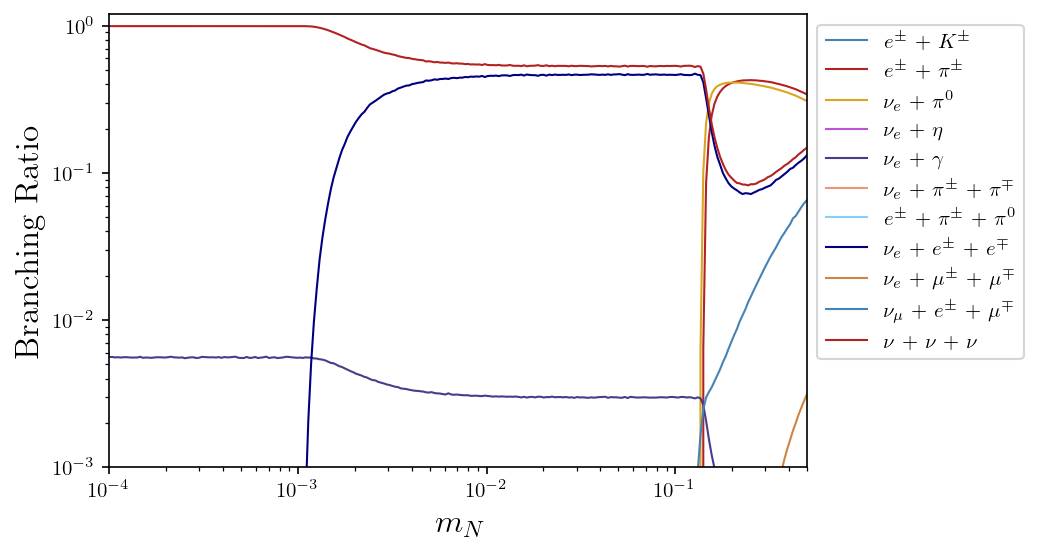

In [5]:
ws = to_catagories_mev(ws_mev_e)

plt.figure(dpi=150)

for key, val in ws.items():
    plt.plot(mns_mev_e, val, label=state_to_latex(key), lw=1)
    
plt.yscale("log")
plt.xscale("log")
plt.ylim(1e-3, 1.2e0)
plt.xlim(np.min(mns_mev), np.max(mns_mev))
plt.ylabel(r"$\mathrm{Branching} \ \mathrm{Ratio}$", fontsize=16)
plt.xlabel(r"$m_{N}$", fontsize=16)
plt.legend(bbox_to_anchor=(1,1))

In [7]:
mns_gev = np.geomspace(5.0, 1e3, 250)
model = RhNeutrinoGeV(mns_gev[-1], 1e-3, Gen.Fst)

keys = model.branching_fractions().keys()
ws_gev = {key: np.zeros_like(mns_gev) for key in keys}

for i, mn in enumerate(mns_gev):
    model = RhNeutrinoGeV(mn, 1e-3, Gen.Fst)
    for key, val in model.branching_fractions().items():
        ws_gev[key][i] = val

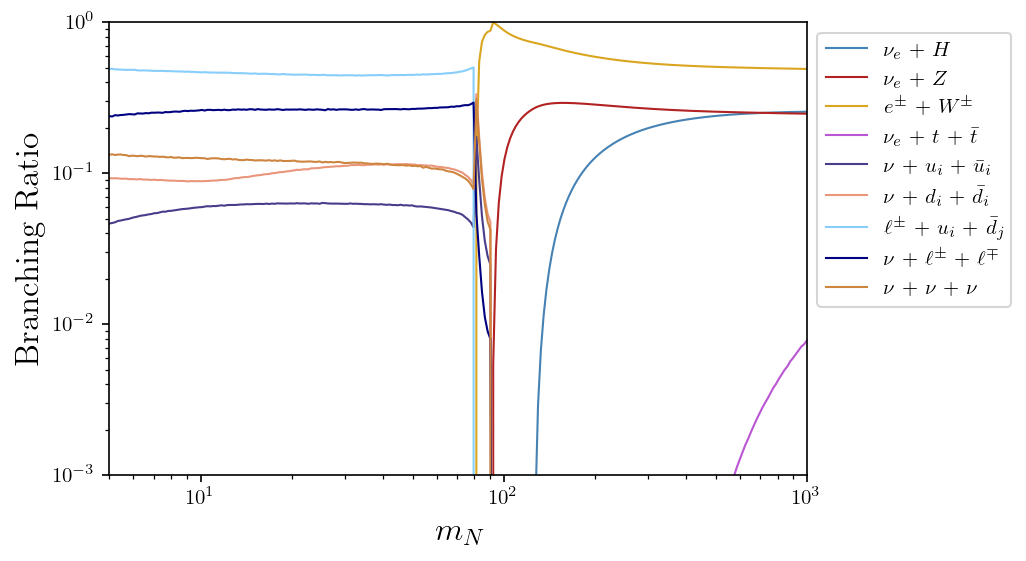

In [8]:
ws = to_catagories_gev(ws_gev)

plt.figure(dpi=150)

ymin = 1e-3

for key, val in ws.items():
    if np.max(val) > ymin:
        plt.plot(mns_gev, val, label=state_to_latex(key), lw=1)
    
plt.yscale("log")
plt.xscale("log")
plt.ylim(ymin, 1e0)
plt.xlim(np.min(mns_gev), np.max(mns_gev))
plt.ylabel(r"$\mathrm{Branching} \ \mathrm{Ratio}$", fontsize=16)
plt.xlabel(r"$m_{N}$", fontsize=16)
plt.legend(bbox_to_anchor=(1,1))

Text(0.5, 0, '$m_{N}$')

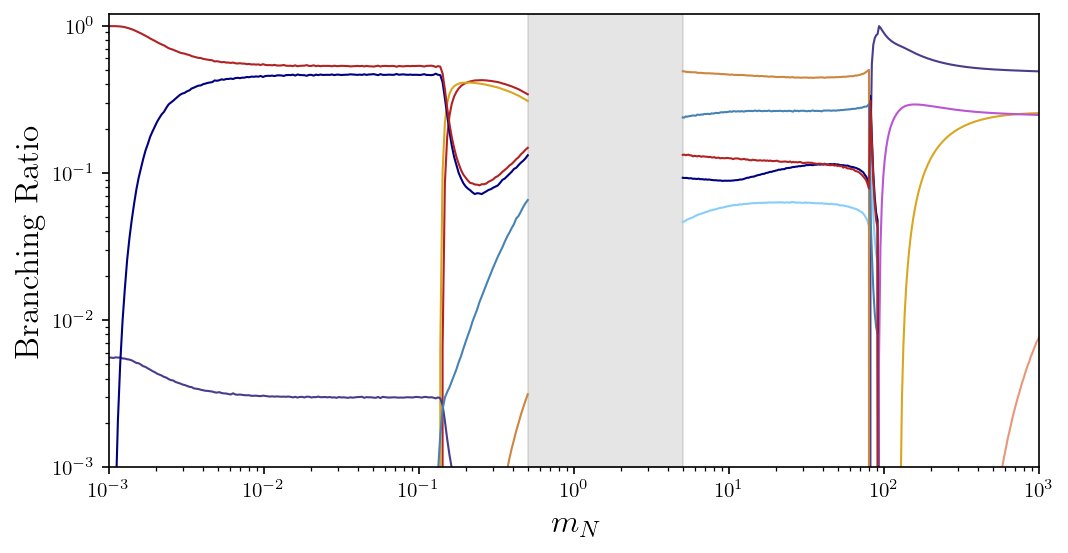

In [9]:
plt.figure(dpi=150, figsize=(8,4))

ymin, ymax = 1e-3, 1.2e0

ws = to_catagories_mev(ws_mev)
for key, val in ws.items():
    plt.plot(mns_mev, val, label=state_to_latex(key), lw=1)

ws = to_catagories_gev(ws_gev)
for key, val in ws.items():
    if np.max(val) > ymin:
        plt.plot(mns_gev, val, label=state_to_latex(key), lw=1)
    
plt.fill_between([0.5, 5.0], ymin, ymax, alpha=0.2, color="grey")

plt.yscale("log")
plt.xscale("log")
plt.ylim(ymin, ymax)
plt.xlim(1e-3, 1e3)
plt.ylabel(r"$\mathrm{Branching} \ \mathrm{Ratio}$", fontsize=16)
plt.xlabel(r"$m_{N}$", fontsize=16)
#plt.legend(bbox_to_anchor=(1,1))